# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>The imdb dataset contains information about 10000 movies collected from TMDB, we are going to analyse these movie data and draw conclusions from them.


### Question(s) for Analysis
>Who are the top 10 directors by their movies' popularity score?  <br>
>What year did movies generate the most revenue?<br>
>What movies generated the most revenue of all time?<br>
>what are the most popular genres?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline #making plots appear in the notebook

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### Loading and exploring the data

In [3]:
df=pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv") #reading the csv file
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]


### Data Cleaning

 

#### Dropping irrelevant columns

In [4]:
df.drop(['id','imdb_id','homepage','tagline','overview','keywords','budget','revenue','release_date','cast'],axis=1,inplace=True)


#### checking for rows with zero values

In [5]:
null=df[(df['revenue_adj']==0) & (df['budget_adj']==0)] #filtering for 0 values for both revenue and budget
null.shape

(4701, 11)

#### It appears that there is 4701 with 0 values for both revenue adjusted and budget adjusted, which isn't ideal

#### dropping nan rows

In [6]:
df.dropna(axis=0) #removing null values

popularity                                    original_title  \
0       32.985763                                    Jurassic World   
1       28.419936                                Mad Max: Fury Road   
2       13.112507                                         Insurgent   
3       11.173104                      Star Wars: The Force Awakens   
4        9.335014                                         Furious 7   
5        9.110700                                      The Revenant   
6        8.654359                                Terminator Genisys   
7        7.667400                                       The Martian   
8        7.404165                                           Minions   
9        6.326804                                        Inside Out   
10       6.200282                                           Spectre   
11       6.189369                                 Jupiter Ascending   
12       6.118847                                        Ex Machina   
13       5.984995                                            Pixels   
14       5.944927                           Avengers: Age of Ultron   
15       5.898400                                 The Hateful Eight   
16       5.749758                                           Taken 3   
17       5.573184                                           Ant-Man   
18       5.556818                                        Cinderella   
19       5.476958             The Hunger Games: Mockingjay - Part 2   
20       5.462138                                      Tomorrowland   
21       5.337064                                          Southpaw   
22       4.907832                                       San Andreas   
23       4.710402                              Fifty Shades of Grey   
24       4.648046                                     The Big Short   
25       4.566713                Mission: Impossible - Rogue Nation   
26       4.564549                                             Ted 2   
27       4.503789                      Kingsman: The Secret Service   
28       4.062293                                         Spotlight   
29       3.968891                    Maze Runner: The Scorch Trials   
...           ...                                               ...   
10834    0.310688                               Return of the Seven   
10835    0.299911                                  The Sand Pebbles   
10836    0.239435                                    Walk Don't Run   
10837    0.291704                                      The Blue Max   
10838    0.151845                                 The Professionals   
10839    0.276133             It's the Great Pumpkin, Charlie Brown   
10840    0.102530                                 Funeral in Berlin   
10841    0.264925                                      The Shooting   
10843    0.252399                                          Khartoum   
10844    0.236098                                     Our Man Flint   
10845    0.230873                                   Carry On Cowboy   
10846    0.212716                       Dracula: Prince of Darkness   
10847    0.034555                                  Island of Terror   
10848    0.207257                                  Fantastic Voyage   
10849    0.206537                                            Gambit   
10850    0.202473                                            Harper   
10851    0.342791                                         Born Free   
10852    0.227220                    A Big Hand for the Little Lady   
10854    0.146402                                         The Chase   
10855    0.141026                           The Ghost & Mr. Chicken   
10856    0.140934                                The Ugly Dachshund   
10857    0.131378                                      Nevada Smith   
10858    0.317824  The Russians Are Coming, The Russians Are Coming   
10859    0.089072                                           Seconds   
10860    0.087034              

In [20]:
df.tail()

popularity            original_title            director  runtime  \
10861    0.080598        The Endless Summer         Bruce Brown       95   
10862    0.065543                Grand Prix  John Frankenheimer      176   
10863    0.065141       Beregis Avtomobilya      Eldar Ryazanov       94   
10864    0.064317    What's Up, Tiger Lily?         Woody Allen       80   
10865    0.035919  Manos: The Hands of Fate    Harold P. Warren       74   

                       genres  \
10861             Documentary   
10862  Action|Adventure|Drama   
10863          Mystery|Comedy   
10864           Action|Comedy   
10865                  Horror   

                                    production_companies  vote_count  \
10861                                  Bruce Brown Films          11   
10862  Cherokee Productions|Joel Productions|Douglas ...          20   
10863                                            Mosfilm          11   
10864                            Benedict Pictures Corp.          22   
10865                                          Norm-Iris          15   

       vote_average  release_year     budget_adj  revenue_adj  
10861           7.4          1966       0.000000          0.0  
10862           5.7          1966       0.000000          0.0  
10863           6.5          1966       0.000000          0.0  
10864           5.4          1966       0.000000          0.0  
10865           1.5          1966  127642.279154          0.0

<a id='eda'></a>
## Exploratory Data Analysis




### top 10 directors by movie popularity score

In [34]:
def barplot(feature,target,n=10):
    """ creates a bar plot with the x axis being the feature and the y axis being the target,
    sorted out in a descneding manner and only getting the top 10 entries in the feature axis.
    --------
    feature: string
           the feature you want to get the top 10 entries for.
    target: string
           the target you want to compare the feature values agains.
    n: int
     the number of entries you want to see plotted in the bar plot.
    """
    df.groupby(feature).mean()[target].sort_values(ascending=False).head(n).plot(kind='bar');
    plt.xlabel(feature.title());
    plt.ylabel(target.title());
    plt.title('{}-{}'.format(feature.title(),target.title()));
    plt.show;

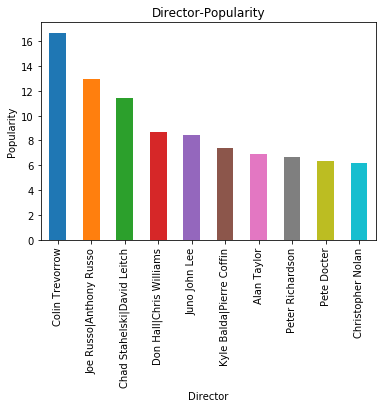

In [35]:
#getting the top 10 directors by their average movies' populartiy
barplot('director','popularity')

### what are the top 10 most popular movies?

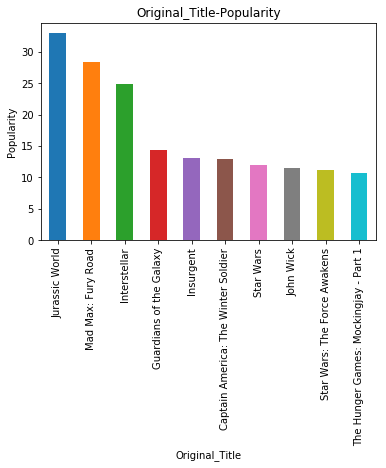

In [24]:
barplot('original_title','popularity') #getting the top 10 popular movies

### what are the top 10 profitable movies of all time?

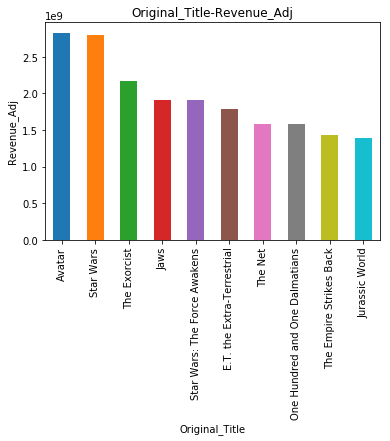

In [25]:
barplot('original_title','revenue_adj') #gettign the top 10 most profitable movies

### top 5 popular genres

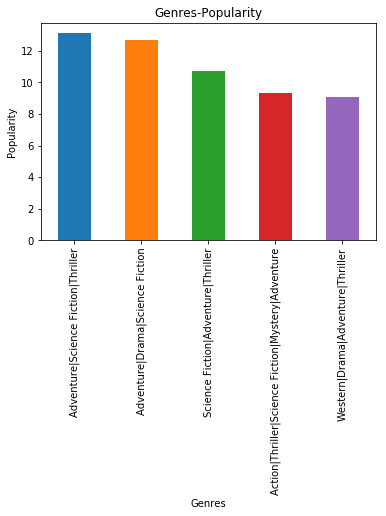

In [32]:
barplot('genres','popularity',n=5) #getting the top 5 popular genres

### does the number of movies released by year increase or decrease?

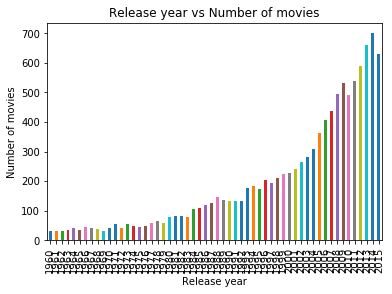

In [41]:
df.groupby('release_year').count()['original_title'].plot(kind='bar');
plt.xlabel('Release year');
plt.ylabel('Number of movies');
plt.title('Release year vs Number of movies');

### the number of movies released by year seems to be in an upwards trend 

### top 5 years by movie revenue (adjusted for 2010 inflation)

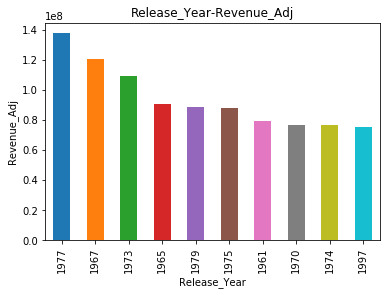

In [33]:
barplot('release_year','revenue_adj')

### interestingly enough we can conclude that people spent more of their money on movies in the past than today, perhaps due to the fact that nowadays streaming services are available and people may not need to go to the cinemas as much, compared to the past.

### what are the correlation between the different dataset features?

In [72]:
df.corr().round(2)

popularity  runtime  vote_count  vote_average  release_year  \
popularity          1.00     0.14        0.80          0.21          0.09   
runtime             0.14     1.00        0.16          0.16         -0.12   
vote_count          0.80     0.16        1.00          0.25          0.11   
vote_average        0.21     0.16        0.25          1.00         -0.12   
release_year        0.09    -0.12        0.11         -0.12          1.00   
budget_adj          0.51     0.22        0.59          0.09          0.02   
revenue_adj         0.61     0.18        0.71          0.19         -0.07   

              budget_adj  revenue_adj  
popularity          0.51         0.61  
runtime             0.22         0.18  
vote_count          0.59         0.71  
vote_average        0.09         0.19  
release_year        0.02        -0.07  
budget_adj          1.00         0.65  
revenue_adj         0.65         1.00

### We can conclude that the budget is positively correlated with the revenue. 
### Vote count is also positively correlated with the popularity (the more popular a movie is the more vote counts from users it recieves).

### How is the distribution of the average voting for each movie? 
### What is the most common vote?

0    6.1
dtype: float64

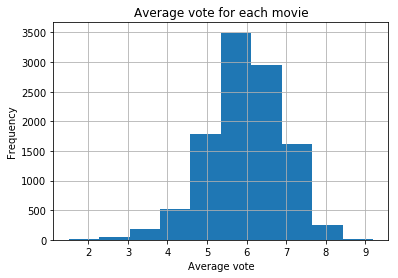

In [56]:
df['vote_average'].hist(); #creating the histogram
plt.title('Average vote for each movie');
plt.ylabel('Frequency');
plt.xlabel('Average vote');
df['vote_average'].mode() #computing the mode

### The average voting for each movie is normally distributed with the most common given vote being 6.1.

<a id='conclusions'></a>
## Conclusions
>Movies that combines action|science fiction|thriller genres are the most popular.<br>
>Movies used to generate more revenue in the past than today (wehn adjusted for inflation), this could be due to numerous reasons that are out of this dataset's scope.<br>
>Avatar is the biggest movie when it comes to revenue so far.<br>
>The number of movies released by year increased over time.<br>
>One of the limits of this dataset is the 0 values for the revenue and the budget, this could be solved using linear regression model to predict the missing values.

In [74]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0